In [1]:
import jieba
import spacy
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from langdetect import detect
import nltk
import pandas as pd
from langdetect import detect
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
from tqdm import tqdm
import numpy as np

In [7]:
# 读取CSV文件
df = pd.read_csv('./fr_zh_500000.csv')

# 从读取的数据中随机抽取50万条数据
df_sampled = df.sample(n=200000, random_state=42)  # 设置随机种子以确保结果的可重复性

In [3]:
# 分词函数
def tokenize_fr(text):
    # 这里可以根据实际情况选择使用不同的分词工具
    # 此处仅作示例，使用空格分词
    return text.split()

def tokenize_zh(text):
    # 使用jieba进行中文分词
    return jieba.lcut(text)

# 定义函数，检查文本是否包含韩语
def contains_korean(text):
    try:
        if detect(text) == 'ko':
            return True
        else:
            return False
    except:
        # 某些文本可能无法识别语言，这种情况下我们默认不包含韩语
        return False

    
# 定义 jieba 分词函数
def jieba_tokenize(text):
    tokens = jieba.lcut(text)
    return tokens

# 定义 SpaCy 分词函数
def spacy_tokenize(text):
    nlp = spacy.load("fr_core_news_sm")
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# 定义函数，对法语文本进行分词
def tokenize_french(text):
    return nltk.word_tokenize(text, language='french')
    

# 删除韩语

In [8]:
# 初始化删除计数器
deleted_count = 0

# 检查 'zh' 列中每行的文本是否包含韩语，如果是，则删除该行，并增加计数器
for index, row in tqdm(df_sampled.iterrows()):
    if contains_korean(row['zh']):
        df_sampled.drop(index, inplace=True)
        deleted_count += 1

# 打印删除的行数
print("删除了 {} 条数据。".format(deleted_count)) 

200000it [13:58, 238.47it/s]

删除了 48656 条数据。


In [10]:
df_sampled = df_sampled.dropna()

In [11]:
nltk.download('punkt')
# 对中文文本进行分词，并添加进度条
tqdm.pandas()
df_sampled['zh_tokens'] = df_sampled['zh'].progress_apply(jieba_tokenize)

# 对法语文本进行分词，并添加进度条
tqdm.pandas()
df_sampled['fr_tokens'] = df_sampled['fr'].progress_apply(tokenize_french)

[nltk_data] Downloading package punkt to /home/xzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|█████████████████████████████████| 151343/151343 [00:15<00:00, 9928.25it/s]


In [12]:
# 打印前几行数据，包含分词结果
print(df_sampled.head())

        Unnamed: 0.1  Unnamed: 0  \
212188        212188      212188   
299036        299036      299036   
475978        475978      475978   
764498        764498      764498   
337706        337706      337706   

                                                       fr  \
212188  Préoccupée par le fait que la base de ressourc...   
299036                               SOCIAUX ET CULTURELS   
475978  Bien qu &apos; une distinction claire ne soit ...   
764498  La prévention des détournements en est l’aspec...   
337706  Il ne devrait pas être nécessaire d &apos; exa...   

                                                       zh  \
212188                                  关注研究训练所的资源基础不断下降,   
299036                              三、从经济、社会、文化权利委员会收到的答复   
475978  有人指出,虽然并非始终都能作出明确的区分,但是立法指南草案应该主要重点处理与专门处理私人融资...   
764498              后一点尤其重要,因为区域间贩运的是前体,而不是安非他明类兴奋剂的最后产品。   
337706              没有必要进一步讨论这一决定草案，因为预计它将在临时议程项目3(a)下通过。   

                                                z

In [13]:
# 切割数据集
train_df, temp_df = train_test_split(df_sampled, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [14]:
# 将分词后的结果保存到文本文件中
with open('./data/train.fr', 'w', encoding='utf-8') as f:
    for tokens in train_df['fr_tokens']:
        f.write(' '.join(tokens) + '\n')

with open('./data/train.zh', 'w', encoding='utf-8') as f:
    for tokens in train_df['zh_tokens']:
        f.write(' '.join(tokens) + '\n')

with open('./data/valid.fr', 'w', encoding='utf-8') as f:
    for tokens in valid_df['fr_tokens']:
        f.write(' '.join(tokens) + '\n')

with open('./data/valid.zh', 'w', encoding='utf-8') as f:
    for tokens in valid_df['zh_tokens']:
        f.write(' '.join(tokens) + '\n')

with open('./data/test.fr', 'w', encoding='utf-8') as f:
    for tokens in test_df['fr_tokens']:
        f.write(' '.join(tokens) + '\n')

with open('./data/test.zh', 'w', encoding='utf-8') as f:
    for tokens in test_df['zh_tokens']:
        f.write(' '.join(tokens) + '\n')


In [15]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3090 Ti


# 数据分析

In [16]:
!apt-get install -y fonts-noto-cjk
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: Impossible d'ouvrir le fichier verrou /var/lib/dpkg/lock-frontend - open (13: Permission non accordée)
E: Impossible d'obtenir le verrou de dpkg (/var/lib/dpkg/lock-frontend). Avez-vous les droits du superutilisateur ?
/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11/100dpi: caching, new cache contents: 358 fonts, 0 dirs
/usr/share/fonts/X11/75dpi: caching, new cache contents: 358 fonts, 0 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents:

In [17]:
!fc-list :lang=zh

/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf: Droid Sans Fallback:style=Regular


/tmp/ipykernel_2203131/2245320023.py:27: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2203131/2245320023.py:27: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2203131/2245320023.py:27: UserWarning: Glyph 44 (,) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2203131/2245320023.py:27: UserWarning: Glyph 46 (.) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2203131/2245320023.py:27: UserWarning: Glyph 47 (/) missing from current font.
  plt.tight_layout()
/home/xzhang/xzhang/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xzhang/xzhang/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xzhang/xzhang/lib/python3.9/site-packages/IPython/core/pylabtools

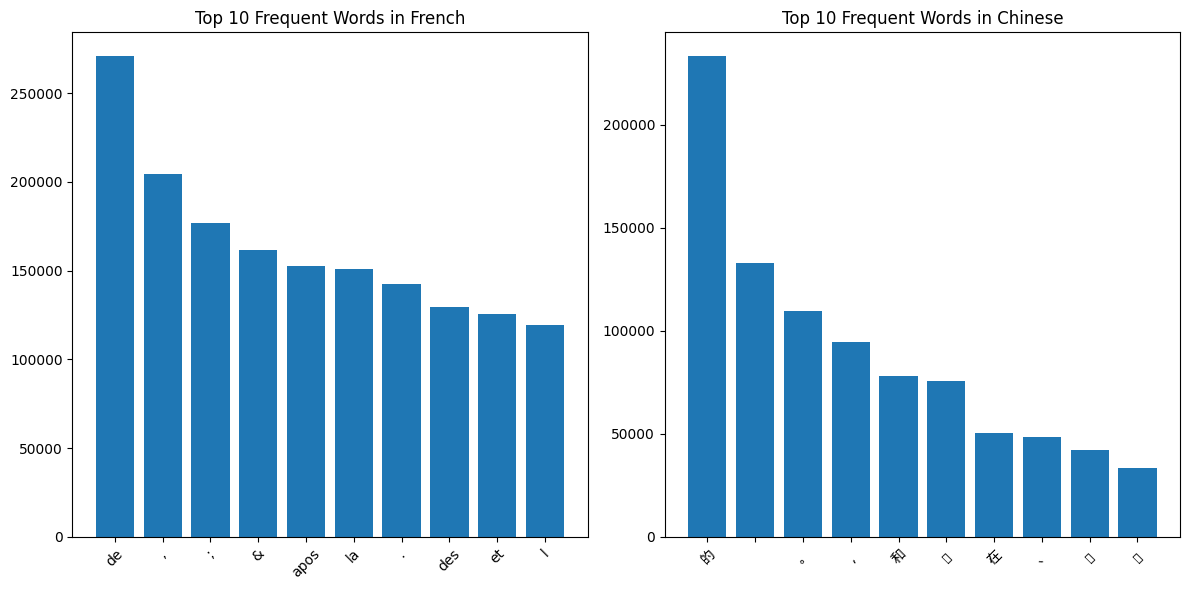

French Vocabulary Size: 79834
Chinese Vocabulary Size: 69780


In [18]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf'
prop = FontProperties(fname=font_path)


# 统计法语词频
fr_all_tokens = [token for tokens_list in df_sampled['fr_tokens'] for token in tokens_list]
fr_word_counts = Counter(fr_all_tokens)

# 统计中文词频
zh_all_tokens = [token for tokens_list in df_sampled['zh_tokens'] for token in tokens_list]
zh_word_counts = Counter(zh_all_tokens)

# 词频统计图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(10), [count for word, count in fr_word_counts.most_common(10)], tick_label=[word for word, count in fr_word_counts.most_common(10)])
plt.title('Top 10 Frequent Words in French')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(range(10), [count for word, count in zh_word_counts.most_common(10)], tick_label=[word for word, count in zh_word_counts.most_common(10)])
plt.title('Top 10 Frequent Words in Chinese')
plt.xticks(rotation=45, fontproperties=prop)
plt.tight_layout()
plt.show()

# 词汇量统计
fr_vocab_size = len(fr_word_counts)
zh_vocab_size = len(zh_word_counts)
print(f"French Vocabulary Size: {fr_vocab_size}")
print(f"Chinese Vocabulary Size: {zh_vocab_size}")

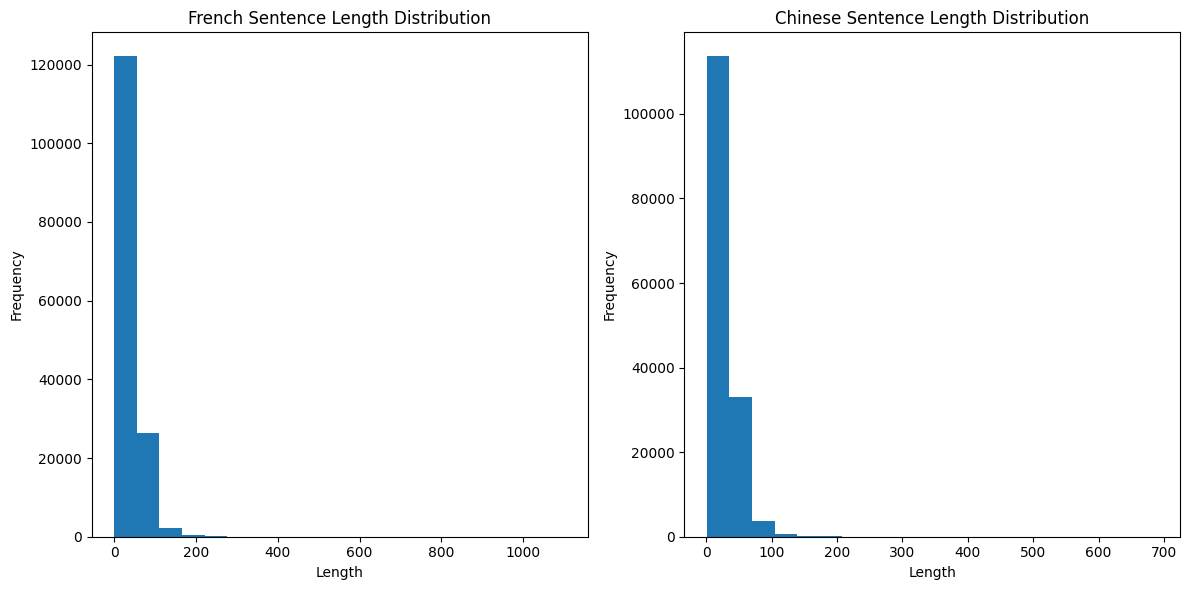

In [19]:
# 统计法语句子长度
fr_sentence_lengths = [len(tokens) for tokens in df_sampled['fr_tokens']]

# 统计中文句子长度
zh_sentence_lengths = [len(tokens) for tokens in df_sampled['zh_tokens']]

# 句子长度分布图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(fr_sentence_lengths, bins=20)
plt.title('French Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(zh_sentence_lengths, bins=20)
plt.title('Chinese Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()